In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
df = pd.read_csv('/Users/zakg04/Documents/HBC_lab/BOOST/Main/TaskLogic/data/test/test-7005/processed/DWL/7005_DWL_A.csv')

listA = [['book', 'flower', 'train', 'rug', 'meadow', 'harp', 'salt', 'finger', 'apple', 'chimney', 'log', 'button', 'key', 'gold', 'rattle'],['bowl', 'dawn', 'judge', 'grant', 'insect', 'plane', 'county', 'pool', 'seed', 'sheep', 'meal', 'coat', 'bottle', 'peach', 'chair']]
listB = [['street', 'grass', 'door', 'arm', 'star', 'wife', 'window', 'city', 'pupil', 'cabin', 'lake', 'pipe', 'skin', 'fire', 'clock'],['baby', 'ocean', 'palace', 'lip', 'bar', 'dress', 'steam', 'coin', 'rock', 'army', 'building', 'friend', 'storm', 'village', 'cell']]
listC = [['tower', 'wheat', 'queen', 'sugar', 'home', 'boy', 'doctor', 'camp', 'flag', 'letter', 'corn', 'nail', 'cattle', 'shore', 'body'],['sky', 'dollar', 'valley', 'butter', 'hall', 'diamond', 'winter', 'mother', 'christmas', 'meat', 'forest', 'tool', 'plant', 'money', 'hotel']]


In [50]:
def fuzzy(sub_list, word_list):

    from fuzzywuzzy import fuzz
    from fuzzywuzzy import process
    print(sub_list)
    print(word_list)
    count =0
    used = []
    passed =[]
    #iterate through the list of lists and compare the first element of each list to all in list of words
    #the word in sub_list that has the highest ratio to a word in word_list is the word that is most similar
    #if that ratio is greater than 80, add 1 to count
    for i in range(len(sub_list)):
        for j in range(len(word_list)):
            ratio = fuzz.ratio(sub_list[i], word_list[j])
            if ratio > 80 and word_list[j] not in used:
                count += 1
                used.append(word_list[j])
                passed.append(sub_list[i])
                break
    return count/len(word_list), passed 

def absolute(sub_list, word_list):

    count = 0
    used = []
    passed = []
    for i in range(len(sub_list)):
        for j in range(len(word_list)):
            if sub_list[i][0] == word_list[j] and word_list[j] not in used:
                count += 1
                used.append(word_list[j])
                passed.append(sub_list[i][0])
                break
    return count/len(word_list), passed 

def plot_circular_bar_graph(percentages, name):
    from math import pi
    startangle = 90
    colors = ['#4393E5', '#43BAE5', '#7AE6EA', '#E5A443']
    
    # Convert data to fit the polar axis
    ys = [i *1.1 for i in range(len(percentages))]   # One bar for each block
    left = (startangle * pi * 2) / 360  # This is to control where the bar starts

    # Figure and polar axis
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = plt.subplot(projection='polar')

    # Plot bars and points at the end to make them round
    for i, (block, percentage) in enumerate(percentages.items()):
        ax.barh(ys[i], percentage * 2 * pi, left=left, height=1, color=colors[i % len(colors)], label=block)
        ax.text(percentage + left + 0.02, ys[i], f'{percentage:.0%}', va='center', ha='left', color='black', fontsize=12)

    plt.ylim(-1, len(percentages))

    # Custom legend
    ax.legend(loc='center', bbox_to_anchor=(0.5, -0.1), frameon=True) 

    # Clear ticks and spines
    plt.xticks([])
    plt.yticks([])
    ax.spines.clear()
    plt.title(name, fontsize=15, pad=20, color="white")

    plt.show()


In [43]:
word_duration = []
for i in range(len(df)-1):
    if i ==0:
        word_duration.append(df['block_dur'][i])
    else:
        word_duration.append(df['block_dur'][i+1] - df['block_dur'][i])

# add word duration for last word
word_duration


[2.120000123977661,
 2.0380001068115234,
 1.7690000534057617,
 1.5529999732971191,
 1.670000076293947,
 1.2189998626708949,
 1.3199999332427996,
 1.5190000534057617,
 1.937999963760376,
 2.30400013923645,
 1.6699998378753662,
 1.2520000934600795,
 1.6200001239776682,
 1.2189998626708913]

In [44]:
word_list = df['multichar_response'].tolist()
word_list

['bookenter',
 'flowerenter',
 'trainenter',
 'rugenter',
 'meadowenter',
 'saltenter',
 'harpenter',
 'fingerenter',
 'appleenter',
 'chimneyenter',
 'logenter',
 'buttonenter',
 'keyenter',
 'rattleenter',
 'goldenter']

In [45]:
#remove last 5 characters of each word

for i in range(len(word_list)):
    word_list[i] = word_list[i][:-5]

word_list

['book',
 'flower',
 'train',
 'rug',
 'meadow',
 'salt',
 'harp',
 'finger',
 'apple',
 'chimney',
 'log',
 'button',
 'key',
 'rattle',
 'gold']

In [47]:
delay_fuzz = fuzzy(word_list, listA[0])
delay_fuzz

['book', 'flower', 'train', 'rug', 'meadow', 'salt', 'harp', 'finger', 'apple', 'chimney', 'log', 'button', 'key', 'rattle', 'gold']
['book', 'flower', 'train', 'rug', 'meadow', 'harp', 'salt', 'finger', 'apple', 'chimney', 'log', 'button', 'key', 'gold', 'rattle']


(1.0,
 ['book',
  'flower',
  'train',
  'rug',
  'meadow',
  'salt',
  'harp',
  'finger',
  'apple',
  'chimney',
  'log',
  'button',
  'key',
  'rattle',
  'gold'])

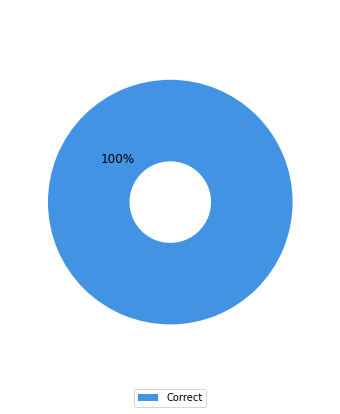

In [51]:
#plot accuracy on circular bar graph
percentages = {'Correct': delay_fuzz[0]}
plot_circular_bar_graph(percentages, 'Accuracy')


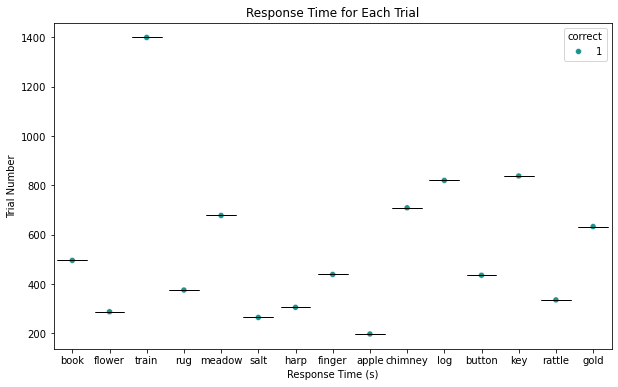

In [66]:
#plot response time as a scatter plot with transparent box and whisker plot on top, demarcate if response was correct or not
correct = []
for i in range(len(word_list)):
    if word_list[i] in delay_fuzz[1]:
        correct.append(1)
    else:
        correct.append(0)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=word_list, y=df['response_time'], hue = correct, palette='viridis')
sns.boxplot(x=word_list, y=df['response_time'], color='black', showfliers=False)
plt.xlabel('Response Time (s)')
plt.ylabel('Trial Number')
#add legend showing 0 as incorrect and 1 as correct as different colors
plt.legend(title='correct')

plt.title('Response Time for Each Trial')
plt.show()


In [78]:
backspace = []
for i in range(len(df)):
    if 'backspace' in df['multichar_response'][i]:
        backspace.append(1)
    else:
        backspace.append(0)
df_delay = pd.DataFrame({'word': word_list, 'response_time': df['response_time'], 'correct': correct, 'backspace': backspace})
df_delay

,word,response_time,correct,backspace
0,book,496,1,0
1,flower,288,1,0
2,train,1399,1,0
3,rug,376,1,0
4,meadow,678,1,0
5,salt,265,1,0
6,harp,306,1,0
7,finger,439,1,0
8,apple,198,1,0
9,chimney,709,1,0


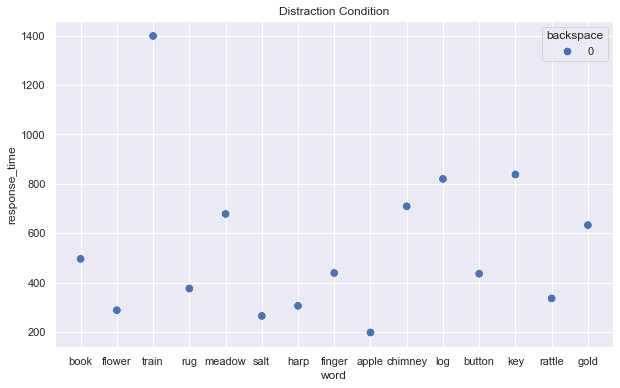

In [85]:

import seaborn as sb
plt.figure(figsize=(10, 6))
#plot the duratiion of each word for dist where blue is no backspace and red is backspace
sb.scatterplot(x = 'word', y = 'response_time', data = df_delay, hue = 'backspace', s=75)
sb.set(rc={'figure.figsize':(20,10)})
plt.title('Distraction Condition')
#add an x if the word is wrong
for i in range(len(df_delay)):
    if df_delay.iloc[i]['word'] not in delay_fuzz[1]:
        plt.text(i, df_delay.iloc[i]['response_time'], 'x', fontsize=12, color='black')
plt.show()

